In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
# load full dataset
deepsolar_original = pd.read_csv('../deepsolar_tract.csv', index_col=0, encoding='ISO-8859-1')

# Pre-Process the Dataset

In [17]:
deepsolar_curated = deepsolar_original[deepsolar_original['population'] != 0]
deepsolar_curated = deepsolar_curated[deepsolar_curated['household_count'] != 0]
deepsolar_curated = deepsolar_curated[deepsolar_curated['population'] >= 100]
deepsolar_curated = deepsolar_curated[deepsolar_curated['household_count'] >= 100]
deepsolar_curated['water_percent'] = deepsolar_curated['water_area']/deepsolar_curated['total_area']
deepsolar_curated = deepsolar_curated[deepsolar_curated['water_percent'] < 0.75]
#deepsolar_curated.drop(labels='water_percent', axis=1, inplace=True)

In [18]:
relevant_cols=['average_household_income','county','gini_index','land_area','per_capita_income','population_density','state','total_area','water_area','education_less_than_high_school_rate','education_high_school_graduate_rate','education_college_rate','education_bachelor_rate','education_master_rate','education_professional_school_rate','education_doctoral_rate','race_white_rate','race_black_africa_rate','race_indian_alaska_rate','race_asian_rate','race_islander_rate','race_other_rate','race_two_more_rate','employ_rate','poverty_family_below_poverty_level_rate','heating_fuel_gas_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_coal_coke_rate','heating_fuel_solar_rate','heating_fuel_other_rate','heating_fuel_none_rate','median_household_income','electricity_price_residential','electricity_consume_residential','average_household_size','housing_unit_median_value','housing_unit_median_gross_rent','lat','lon','elevation','cooling_design_temperature','earth_temperature_amplitude','frost_days','relative_humidity','daily_solar_radiation','atmospheric_pressure','wind_speed','age_18_24_rate','age_25_34_rate','age_more_than_85_rate','age_75_84_rate','age_35_44_rate','age_45_54_rate','age_65_74_rate','age_55_64_rate','age_10_14_rate','age_15_17_rate','age_5_9_rate','household_type_family_rate','dropout_16_19_inschool_rate','occupation_construction_rate','occupation_public_rate','occupation_information_rate','occupation_finance_rate','occupation_education_rate','occupation_administrative_rate','occupation_manufacturing_rate','occupation_wholesale_rate','occupation_retail_rate','occupation_transportation_rate','occupation_arts_rate','occupation_agriculture_rate','occupancy_vacant_rate','occupancy_owner_rate','mortgage_with_rate','transportation_home_rate','transportation_car_alone_rate','transportation_walk_rate','transportation_carpool_rate','transportation_motorcycle_rate','transportation_bicycle_rate','transportation_public_rate','travel_time_less_than_10_rate','travel_time_10_19_rate','travel_time_20_29_rate','travel_time_30_39_rate','travel_time_40_59_rate','travel_time_60_89_rate','health_insurance_public_rate','health_insurance_none_rate','age_median','travel_time_average','voting_2016_dem_percentage','voting_2016_dem_win','voting_2012_dem_win','number_of_years_of_education','diversity','number_of_solar_system_per_household','incentive_count_residential','incentive_residential_state_level','net_metering','feedin_tariff','cooperate_tax','property_tax','sales_tax','rebate','avg_electricity_retail_rate'
]
relevant_cols.remove('land_area')
relevant_cols.remove('water_area')
relevant_cols.remove('total_area')
relevant_cols.append('water_percent')
#solar_fields=pd.read_csv('../deepsolar fields.csv')
#supp_cols=solar_fields.loc[(solar_fields['Mentioned in Supplemental Info']==1)]['Field'].tolist()
#all_cols=set(relevant_cols+supp_cols)
#deepsolar_curated=deepsolar_curated[all_cols]
deepsolar_curated=deepsolar_curated[relevant_cols]

In [88]:
for i in relevant_cols:
    print(i,deepsolar_curated.dtypes[i])

average_household_income float64
county object
gini_index float64
land_area float64
per_capita_income float64
population_density float64
state object
total_area float64
water_area float64
education_less_than_high_school_rate float64
education_high_school_graduate_rate float64
education_college_rate float64
education_bachelor_rate float64
education_master_rate float64
education_professional_school_rate float64
education_doctoral_rate float64
race_white_rate float64
race_black_africa_rate float64
race_indian_alaska_rate float64
race_asian_rate float64
race_islander_rate float64
race_other_rate float64
race_two_more_rate float64
employ_rate float64
poverty_family_below_poverty_level_rate float64
heating_fuel_gas_rate float64
heating_fuel_electricity_rate float64
heating_fuel_fuel_oil_kerosene_rate float64
heating_fuel_coal_coke_rate float64
heating_fuel_solar_rate float64
heating_fuel_other_rate float64
heating_fuel_none_rate float64
median_household_income float64
electricity_price_resid

In [86]:
deepsolar_curated['elevation']. \
    fillna(deepsolar_curated['elevation'].median(), inplace=True)
deepsolar_curated['daily_solar_radiation']. \
    fillna(deepsolar_curated['daily_solar_radiation'].median(), inplace=True)
deepsolar_curated['lat']. \
    fillna(deepsolar_curated['lat'].median(), inplace=True)
deepsolar_curated['lon']. \
    fillna(deepsolar_curated['lon'].median(), inplace=True)
deepsolar_curated['cooling_design_temperature']. \
    fillna(deepsolar_curated['cooling_design_temperature'].median(), inplace=True)
deepsolar_curated['earth_temperature_amplitude']. \
    fillna(deepsolar_curated['earth_temperature_amplitude'].median(), inplace=True)
deepsolar_curated['frost_days']. \
    fillna(deepsolar_curated['frost_days'].median(), inplace=True)
deepsolar_curated['relative_humidity']. \
    fillna(deepsolar_curated['relative_humidity'].median(), inplace=True)
deepsolar_curated['atmospheric_pressure']. \
    fillna(deepsolar_curated['atmospheric_pressure'].median(), inplace=True)
deepsolar_curated['wind_speed']. \
    fillna(deepsolar_curated['wind_speed'].median(), inplace=True)
    

In [87]:
deepsolar_curated['housing_unit_median_gross_rent']. \
    fillna(deepsolar_curated['housing_unit_median_gross_rent'].median(), inplace=True)
deepsolar_curated['housing_unit_median_value']. \
    fillna(deepsolar_curated['housing_unit_median_value'].median(), inplace=True)
deepsolar_curated['dropout_16_19_inschool_rate']. \
    fillna(deepsolar_curated['dropout_16_19_inschool_rate'].median(), inplace=True)
deepsolar_curated['mortgage_with_rate']. \
    fillna(deepsolar_curated['mortgage_with_rate'].median(), inplace=True)
deepsolar_curated['median_household_income']. \
    fillna(deepsolar_curated['median_household_income'].median(), inplace=True)
deepsolar_curated['travel_time_average']. \
    fillna(deepsolar_curated['travel_time_average'].median(), inplace=True)

In [19]:
for i in range(len(deepsolar_curated.dtypes)):
    if (deepsolar_curated.columns[i] == 'number_of_solar_system_per_household') | (deepsolar_curated.dtypes[i] not in ['float64','int64']):
        continue
    else:
        deepsolar_curated[deepsolar_curated.columns[i]]. \
    fillna(deepsolar_curated[deepsolar_curated.columns[i]].median(), inplace=True)

## Alternatively, use county/state medians

In [6]:
for i in range(len(deepsolar_curated.dtypes)):
    if (deepsolar_curated.columns[i] == 'number_of_solar_system_per_household') | (deepsolar_curated.dtypes[i] not in ['float64','int64']):
        continue
    else:
        deepsolar_curated[deepsolar_curated.columns[i]]=deepsolar_curated[[deepsolar_curated.columns[i],'county']] \
        .groupby('county').transform(lambda x: x.fillna(x.median()))
        deepsolar_curated[deepsolar_curated.columns[i]]=deepsolar_curated[[deepsolar_curated.columns[i],'state']] \
        .groupby('state').transform(lambda x: x.fillna(x.median()))

C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\noahw\Anaconda3\envs\ipyk

In [20]:
# Confirm missing values have all been replaced
missing_val_count = deepsolar_curated.isnull().sum().sort_values(ascending=False)
for a,b, in missing_val_count.iteritems():
    if b>0:
        print("{:<30}\t{}".format(a,b))
# No output means there is no missing data

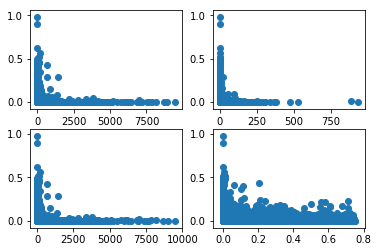

In [92]:
data=deepsolar_curated[['land_area','water_area','total_area','water_percent','number_of_solar_system_per_household']].replace(np.inf,np.nan).dropna()

fig,ax=plt.subplots(2,2)
ax[0,0].scatter(data['land_area'],data['number_of_solar_system_per_household'])
ax[0,1].scatter(data['water_area'],data['number_of_solar_system_per_household'])
ax[1,0].scatter(data['total_area'],data['number_of_solar_system_per_household'])
ax[1,1].scatter(data['water_percent'],data['number_of_solar_system_per_household'])

plt.show()

# Build Model

In [21]:
deepsolar=deepsolar_curated.copy()

In [22]:
# Encode string features (county and state) into numeric features
LE = preprocessing.LabelEncoder()

LE.fit(deepsolar['county'])
deepsolar['county'] = LE.transform(deepsolar['county'])

LE.fit(deepsolar['state'])
deepsolar['state'] = LE.transform(deepsolar['state'])

print("Dataset rows and dimensions:", deepsolar.shape)

Dataset rows and dimensions: (71305, 111)


In [23]:
# create binary outcome variable for stage 1 RF classifier
deepsolar['solar_flag']=deepsolar['number_of_solar_system_per_household'].apply(lambda x: int(x>0))

In [24]:
Y_classifier = deepsolar['solar_flag'].values
Y_regressor = deepsolar['number_of_solar_system_per_household'].values

In [48]:
# Normalize
#deepsolar = (deepsolar - deepsolar.mean())/(deepsolar.max() - deepsolar.min())

In [25]:
X = deepsolar.drop(labels=['solar_flag', 'number_of_solar_system_per_household'], axis=1).values

In [26]:
# set a random seed to keep the split the same 
np.random.seed(0)

# shuffle data
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]
Y_classifier = Y_classifier[shuffle]
Y_regressor = Y_regressor[shuffle]

# split data and labels into test set and initial training set
n_train = int(0.8*X.shape[0])
X_train1 = X[:n_train,:]
X_test = X[n_train:,:]
Y_classifier_train1 = Y_classifier[:n_train]
Y_classifier_test = Y_classifier[n_train:]
Y_regressor_train1 = Y_regressor[:n_train]
Y_regressor_test = Y_regressor[n_train:]

# split training data and labels into training and development sets
n_train = int(0.8*X_train1.shape[0])
X_train = X_train1[:n_train,:]
X_dev = X_train1[n_train:,:]
Y_classifier_train = Y_classifier_train1[:n_train]
#X_train_r=X_train[Y_classifier_train>0]
Y_classifier_dev = Y_classifier_train1[n_train:]
Y_regressor_train = Y_regressor_train1[:n_train]
#Y_regressor_train_r=Y_regressor_train[Y_classifier_train>0]
Y_regressor_dev = Y_regressor_train1[n_train:]

print("{:<35}\t{}".format("Training data shape:", X_train.shape))
print("{:<35}\t{}".format("Training outcome variable - classifier:",Y_classifier_train.shape ))
print("{:<35}\t{}".format("Training outcome variable - regressor:",Y_regressor_train.shape ))
print("{:<35}\t{}".format("Dev data shape:", X_dev.shape))
print("{:<35}\t{}".format("Dev outcome variable - classifier:",Y_classifier_dev.shape ))
print("{:<35}\t{}".format("Dev outcome variable - regressor:",Y_regressor_dev.shape ))
print("{:<35}\t{}".format("Test data shape:", X_test.shape))
print("{:<35}\t{}".format("Test outcome variable - classifier:",Y_classifier_test.shape ))
print("{:<35}\t{}".format("Test outcome variable - regressor:",Y_regressor_test.shape ))

Training data shape:               	(45635, 110)
Training outcome variable - classifier:	(45635,)
Training outcome variable - regressor:	(45635,)
Dev data shape:                    	(11409, 110)
Dev outcome variable - classifier: 	(11409,)
Dev outcome variable - regressor:  	(11409,)
Test data shape:                   	(14261, 110)
Test outcome variable - classifier:	(14261,)
Test outcome variable - regressor: 	(14261,)


## Train Classifier

In [55]:
RF1_Classifier = RandomForestClassifier(n_estimators=50, max_depth=None,n_jobs=-1)
RF1_Classifier.fit(X_train, Y_classifier_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
# Accuracy
RF1_Classifier.score(X_dev,Y_classifier_dev)

0.804890875624507

## Top Classifier Importances

In [57]:
cols=list(deepsolar.columns)
cols.remove('solar_flag')
cols.remove('number_of_solar_system_per_household')

In [17]:
feature_importances=RF1_Classifier.feature_importances_
features=cols
feature_tuples=[(features[i],feature_importances[i]) for i in range(len(features))]
sorted_features=sorted(feature_tuples,reverse=True,key=lambda k: k[1])
for i in range(0,20):
    print(sorted_features[i])

('population_density', 0.06132924315389274)
('heating_fuel_coal_coke_rate', 0.03089034442922619)
('housing_unit_median_value', 0.023599865030469756)
('race_asian_rate', 0.018951697736933414)
('occupancy_vacant_rate', 0.018885892534355426)
('daily_solar_radiation', 0.01795871003447209)
('race_white_rate', 0.01668334906857171)
('lon', 0.016608333531018503)
('mortgage_with_rate', 0.016120496349818512)
('education_high_school_graduate_rate', 0.015163749912424411)
('housing_unit_median_gross_rent', 0.014363646092850022)
('travel_time_less_than_10_rate', 0.0131246987291187)
('average_household_income', 0.012612279063199722)
('occupation_agriculture_rate', 0.012429144754572484)
('education_bachelor_rate', 0.012348042914657922)
('relative_humidity', 0.012274779595037281)
('education_master_rate', 0.012196489364540106)
('transportation_public_rate', 0.01208030014966165)
('transportation_car_alone_rate', 0.011970850789146711)
('median_household_income', 0.011722047597577294)


## Train the Regressor

In [58]:
RF1_Regressor = RandomForestRegressor(n_estimators=50, max_depth=None,n_jobs=-1)
RF1_Regressor.fit(X_train, Y_regressor_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
dev_preds=RF1_Regressor.predict(X_dev)

In [60]:
r2_score(Y_regressor_dev,dev_preds)

0.7406784131202631

## Regressor Feature Importances

In [21]:
feature_importances=RF1_Regressor.feature_importances_
features=cols
feature_tuples=[(features[i],feature_importances[i]) for i in range(len(features))]
sorted_features=sorted(feature_tuples,reverse=True,key=lambda k: k[1])
for i in range(0,len(features)):
    print(sorted_features[i])

('incentive_count_residential', 0.20507802226757155)
('occupancy_owner_rate', 0.13169227435834832)
('daily_solar_radiation', 0.059953819261581075)
('median_household_income', 0.04108059402655375)
('lon', 0.039852557882783975)
('education_college_rate', 0.028539709022146913)
('population_density', 0.02583358614381313)
('lat', 0.0227039087018698)
('housing_unit_median_gross_rent', 0.022643370357649628)
('voting_2016_dem_percentage', 0.01963549692531311)
('household_type_family_rate', 0.017383643609676123)
('relative_humidity', 0.01374212571019367)
('health_insurance_public_rate', 0.012528569769911376)
('occupation_manufacturing_rate', 0.012310786474596097)
('housing_unit_median_value', 0.011286832895327514)
('sales_tax', 0.011054829877934148)
('average_household_income', 0.010422309301073622)
('heating_fuel_coal_coke_rate', 0.010197013858241281)
('county', 0.008096210091621451)
('education_less_than_high_school_rate', 0.00808618877554562)
('mortgage_with_rate', 0.007500269928283847)
('oc

## Get Final R^2 for Model

In [61]:
classifier_dev_preds=RF1_Classifier.predict(X_dev)

In [62]:
final_preds=classifier_dev_preds*dev_preds

In [63]:
r2_score(Y_regressor_dev,final_preds)

0.7418871890119146

# 10-Fold Validation

In [27]:
from sklearn.model_selection import KFold

In [28]:
folds=KFold(n_splits=10, random_state=None, shuffle=True)
X_trains=[]
X_devs=[]
yr_trains=[]
yr_devs=[]

for train_index, dev_index in folds.split(X_train1):

    X_trains.append(X_train1[train_index])
    X_devs.append(X_train1[dev_index])
    yr_trains.append(Y_regressor_train1[train_index])
    yr_devs.append(Y_regressor_train1[dev_index])

In [29]:
r2s=[]

for i in range(len(X_trains)):
    RF1_Regressor = RandomForestRegressor(n_estimators=50, max_depth=None,n_jobs=-1)
    RF1_Regressor.fit(X_trains[i], yr_trains[i])
    dev_preds=RF1_Regressor.predict(X_devs[i])
    r2s.append(r2_score(yr_devs[i],dev_preds))

In [30]:
r2s

[0.7280612890887794,
 0.5318676143440155,
 0.6233163845615196,
 0.6252182269206215,
 0.7653768850798968,
 0.7204879029646166,
 0.6865891213837165,
 0.6683166784064679,
 0.7257684186084457,
 0.7284356996153942]

In [31]:
sum(r2s)/len(r2s)

0.6803438220973475

## Try Again with all features from supplemental Info

In [10]:
deepsolar_curated = deepsolar_original[deepsolar_original['population'] != 0]
deepsolar_curated = deepsolar_curated[deepsolar_curated['household_count'] != 0]
deepsolar_curated = deepsolar_curated[deepsolar_curated['population'] >= 100]
deepsolar_curated = deepsolar_curated[deepsolar_curated['household_count'] >= 100]
deepsolar_curated['water_percent'] = deepsolar_curated['water_area']/deepsolar_curated['total_area']
deepsolar_curated = deepsolar_curated[deepsolar_curated['water_percent'] < 0.75]
#deepsolar_curated.drop(labels='water_percent', axis=1, inplace=True)

In [11]:
relevant_cols=['average_household_income','county','gini_index','land_area','per_capita_income','population_density','state','total_area','water_area','education_less_than_high_school_rate','education_high_school_graduate_rate','education_college_rate','education_bachelor_rate','education_master_rate','education_professional_school_rate','education_doctoral_rate','race_white_rate','race_black_africa_rate','race_indian_alaska_rate','race_asian_rate','race_islander_rate','race_other_rate','race_two_more_rate','employ_rate','poverty_family_below_poverty_level_rate','heating_fuel_gas_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_coal_coke_rate','heating_fuel_solar_rate','heating_fuel_other_rate','heating_fuel_none_rate','median_household_income','electricity_price_residential','electricity_consume_residential','average_household_size','housing_unit_median_value','housing_unit_median_gross_rent','lat','lon','elevation','cooling_design_temperature','earth_temperature_amplitude','frost_days','relative_humidity','daily_solar_radiation','atmospheric_pressure','wind_speed','age_18_24_rate','age_25_34_rate','age_more_than_85_rate','age_75_84_rate','age_35_44_rate','age_45_54_rate','age_65_74_rate','age_55_64_rate','age_10_14_rate','age_15_17_rate','age_5_9_rate','household_type_family_rate','dropout_16_19_inschool_rate','occupation_construction_rate','occupation_public_rate','occupation_information_rate','occupation_finance_rate','occupation_education_rate','occupation_administrative_rate','occupation_manufacturing_rate','occupation_wholesale_rate','occupation_retail_rate','occupation_transportation_rate','occupation_arts_rate','occupation_agriculture_rate','occupancy_vacant_rate','occupancy_owner_rate','mortgage_with_rate','transportation_home_rate','transportation_car_alone_rate','transportation_walk_rate','transportation_carpool_rate','transportation_motorcycle_rate','transportation_bicycle_rate','transportation_public_rate','travel_time_less_than_10_rate','travel_time_10_19_rate','travel_time_20_29_rate','travel_time_30_39_rate','travel_time_40_59_rate','travel_time_60_89_rate','health_insurance_public_rate','health_insurance_none_rate','age_median','travel_time_average','voting_2016_dem_percentage','voting_2016_dem_win','voting_2012_dem_win','number_of_years_of_education','diversity','number_of_solar_system_per_household','incentive_count_residential','incentive_residential_state_level','net_metering','feedin_tariff','cooperate_tax','property_tax','sales_tax','rebate','avg_electricity_retail_rate'
]
relevant_cols.remove('land_area')
relevant_cols.remove('water_area')
relevant_cols.remove('total_area')
relevant_cols.append('water_percent')
solar_fields=pd.read_csv('../deepsolar fields.csv')
supp_cols=solar_fields.loc[(solar_fields['Mentioned in Supplemental Info']==1)]['Field'].tolist()
all_cols=set(relevant_cols+supp_cols)
deepsolar_curated=deepsolar_curated[all_cols]

In [13]:
for i in range(len(deepsolar_curated.dtypes)):
    if (deepsolar_curated.columns[i] == 'number_of_solar_system_per_household') | (deepsolar_curated.dtypes[i] not in ['float64','int64']):
        continue
    else:
        deepsolar_curated[deepsolar_curated.columns[i]]. \
    fillna(deepsolar_curated[deepsolar_curated.columns[i]].median(), inplace=True)

In [14]:
# Confirm missing values have all been replaced
missing_val_count = deepsolar_curated.isnull().sum().sort_values(ascending=False)
for a,b, in missing_val_count.iteritems():
    if b>0:
        print("{:<30}\t{}".format(a,b))
# No output means there is no missing data

In [15]:
from sklearn.model_selection import KFold